In [34]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy.optimize import curve_fit
from scipy.stats import linregress

def gaussian(x, mu, sigma, A):
    return (A*(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1/2)*((x-mu)/sigma)**2))


In [18]:
filename = 'Mn54'

In [19]:
file = open(f'{filename}_out.csv', 'r')

reader = csv.reader(file)

head = next(reader, None)
print(head)
head = next(reader, None)
print(head)

L = []

for row in reader:
    L.append(float(row[0]))

L = np.array(L)


['../Data/Mn54 channel 0, False events, cuts False']
['L [ch]', 'S[ch]', 'T (trigger) [us]', 'baseline', 'pulse height [bits]']


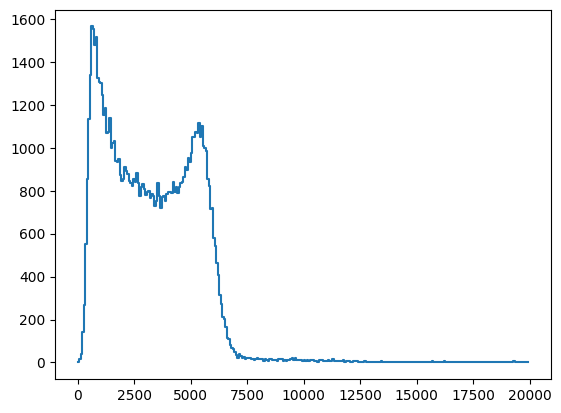

In [30]:
hist = np.histogram(L, bins=300, range=(0, 20000,))
plt.step(hist[1][:-1], hist[0])
plt.show()

[  6096.15429526    352.27150356 -68182.83199271]


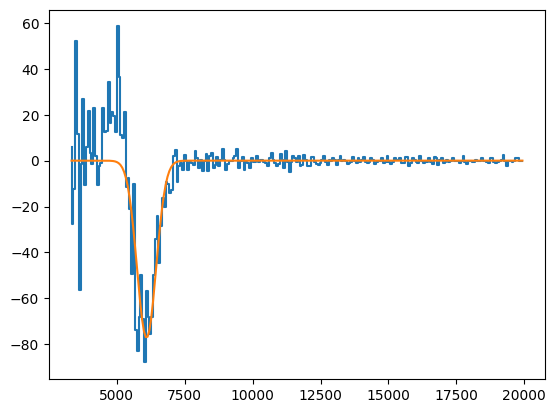

In [31]:
grad = np.gradient(hist[0])

popt, pcov = curve_fit(gaussian, hist[1][50:-1], grad[50:], [6500,500,-1])

print(popt)

plt.figure()
plt.step(hist[1][50:-1], grad[50:])
plt.plot(hist[1][50:-1], gaussian(hist[1][50:-1], *popt))

Cs - 4536.08069666
661.657 -> 477.333

Na - 3221.98311769
511 -> 340.67
Na - 10271.60805223
1274.537 -> 1061.702

Ba - 1913.18662731
356.0129 -> 207.2649407

Mn - 6096.15429526
834.848 -> 639.2190228

LinregressResult(slope=0.00010230476254145869, intercept=0.012454430536400718, rvalue=0.9999820953687263, pvalue=9.094540545036703e-08, stderr=3.534587562500563e-07, intercept_stderr=0.002104706754951536)


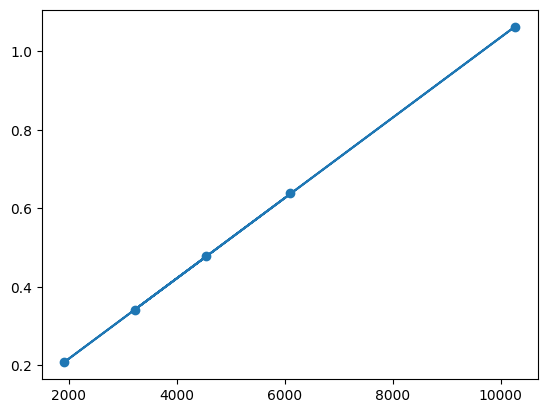

In [36]:
# Long integral values
x = np.array([4536.08069666, 3221.98311769, 10271.60805223, 1913.18662731, 6096.15429526])
# Energies in MeV
y = np.array([0.47733374509, 0.340666666, 1.0617027983, 0.2072649407, 0.6392190228])

plt.scatter(x, y)

lin_regress = linregress(x, y)
print(lin_regress)

plt.plot(x, lin_regress[0] * x + lin_regress[1])



slope=0.00010230476254145869, intercept=0.012454430536400718